In [510]:
# Making dataset

In [511]:
from sklearn.datasets import make_circles
X , y = make_circles(1000,noise=0.05)

In [512]:
import pandas as pd
df = pd.DataFrame(dict(X1=X[:,0],X2=X[:,1],label=y))

In [513]:
df

,X1,X2,label
0,-0.024522,0.924978,0
1,0.073814,1.026296,0
2,0.631611,-0.722722,0
3,0.770242,-0.073639,1
4,0.683032,0.489634,1
...,...,...,...
995,0.701684,-0.688407,0
996,-0.646400,0.414266,1
997,1.064658,-0.240318,0
998,-0.787046,0.451564,1


In [514]:
# Analysing the dataset made to get a better idea of the problem

In [515]:
X[:5]

array([[-0.02452188,  0.92497802],
       [ 0.07381369,  1.02629605],
       [ 0.63161104, -0.72272158],
       [ 0.77024213, -0.07363924],
       [ 0.68303155,  0.4896337 ]])

In [516]:
y[:5]

array([0, 0, 0, 1, 1])

In [517]:
X.shape

(1000, 2)

In [518]:
y.shape

(1000,)

In [519]:
X[1].shape

(2,)

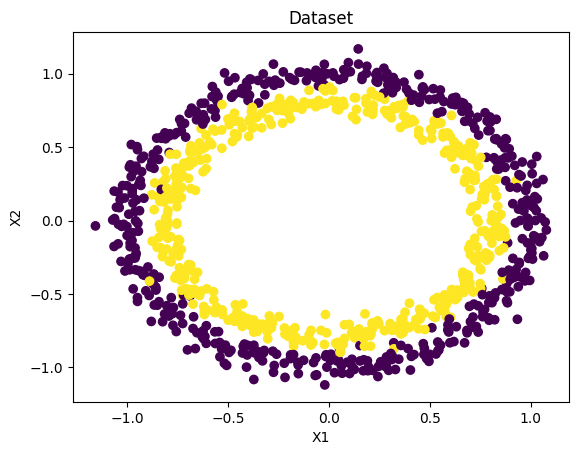

In [520]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.title ("Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [521]:
# Wriring code to deal with this biniary classification problem

In [522]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=42 , test_size = 0.2)

In [523]:
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [524]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [525]:
import torch
import torch.nn as nn

class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3((self.layer_2(self.layer_1(x)))).squeeze()

In [526]:
model_0 = CircleModel()
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2435, -0.3386],
                      [-0.5755,  0.5929],
                      [-0.2830,  0.1874],
                      [-0.2453,  0.0575],
                      [ 0.6592,  0.3258],
                      [-0.6128,  0.2807],
                      [ 0.6712,  0.1860],
                      [ 0.4741,  0.6971],
                      [-0.1083,  0.1468],
                      [-0.4915, -0.1457]])),
             ('layer_1.bias',
              tensor([ 0.5237,  0.3625, -0.4474, -0.5670, -0.4832, -0.6978, -0.5456, -0.1749,
                       0.4772,  0.1184])),
             ('layer_2.weight',
              tensor([[-0.2405, -0.2537,  0.1573, -0.2352, -0.0389,  0.1517, -0.1464, -0.0345,
                       -0.0275, -0.0748],
                      [-0.1603, -0.2819, -0.2556, -0.1693,  0.3054, -0.1527, -0.2124,  0.0767,
                        0.0872,  0.1733],
                      [ 0.2404,  0.1761, -0.3135,  0.0280,  0.1916, -0.0

In [527]:
loss_fn = nn.BCEWithLogitsLoss() # it takes input as raw logits and have sigmoid in itself , it's numerally stable that's why we have taken over BCELoss
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [528]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [529]:
# Training and Testing Loop
epochs = 100

for i in range(epochs):
  y_preds = torch.round(torch.sigmoid(model_0(X_train))).squeeze() # model_0(X) -> yogits , sigmoid will convert that into prediction probabilities and , torch.round -> will round off pred probabilities
  loss = loss_fn(y_preds,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing Loop
  model_0.eval()
  with torch.inference_mode():
    y_pred_test = torch.round(torch.sigmoid(model_0(X_test))).squeeze()
    loss_test = loss_fn(y_pred_test,y_test)
    acc_test = accuracy_fn(y_pred_test,y_test)
  if i % 10 == 0:
    print(f"Epoch : {i} , Training Loss : {loss} , Testing Loss : {loss_test} ")

Epoch : 0 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 
Epoch : 10 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 
Epoch : 20 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 
Epoch : 30 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 
Epoch : 40 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 
Epoch : 50 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 
Epoch : 60 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 
Epoch : 70 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 
Epoch : 80 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 
Epoch : 90 , Training Loss : 0.6931473016738892 , Testing Loss : 0.6931471824645996 


In [530]:
y_preds

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [531]:
# Checking our model is capable of learning even or not

In [532]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [533]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


In [534]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [535]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [536]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression, y_train_regression
X_test_regression, y_test_regression = X_test_regression, y_test_regression

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.32193, Test loss: 0.21726
Epoch: 100 | Train loss: 0.11079, Test loss: 0.03065
Epoch: 200 | Train loss: 0.06253, Test loss: 0.03257
Epoch: 300 | Train loss: 0.05315, Test loss: 0.02077
Epoch: 400 | Train loss: 0.05132, Test loss: 0.00858
Epoch: 500 | Train loss: 0.06930, Test loss: 0.00677
Epoch: 600 | Train loss: 0.06760, Test loss: 0.03384
Epoch: 700 | Train loss: 0.05569, Test loss: 0.00865
Epoch: 800 | Train loss: 0.06050, Test loss: 0.01242
Epoch: 900 | Train loss: 0.07752, Test loss: 0.03169


In [537]:
# The model works okayy

In [538]:
from pathlib import Path
import requests

request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

In [539]:
with open("helper_functions.py","wb") as f:
  f.write(request.content)

In [540]:
from helper_functions import plot_predictions, plot_decision_boundary

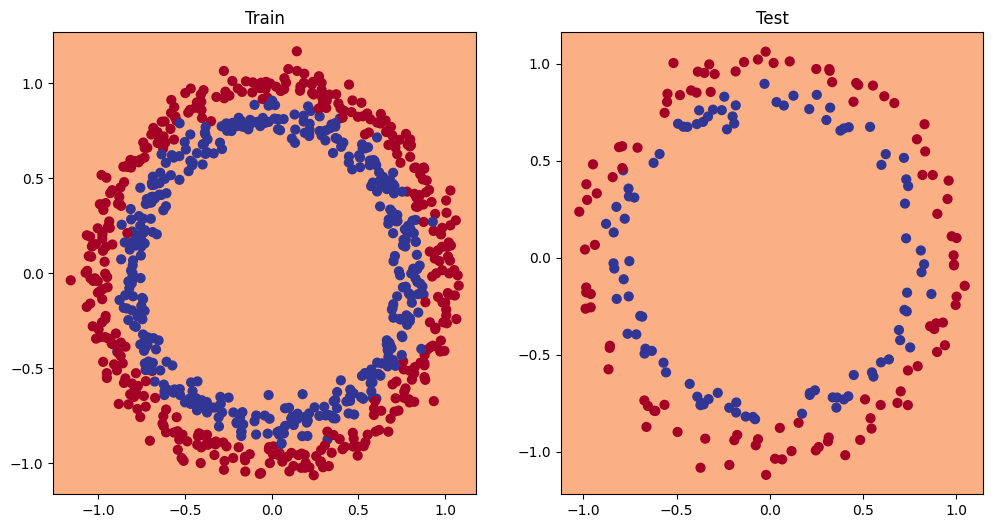

In [541]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [542]:
df

,X1,X2,label
0,-0.024522,0.924978,0
1,0.073814,1.026296,0
2,0.631611,-0.722722,0
3,0.770242,-0.073639,1
4,0.683032,0.489634,1
...,...,...,...
995,0.701684,-0.688407,0
996,-0.646400,0.414266,1
997,1.064658,-0.240318,0
998,-0.787046,0.451564,1


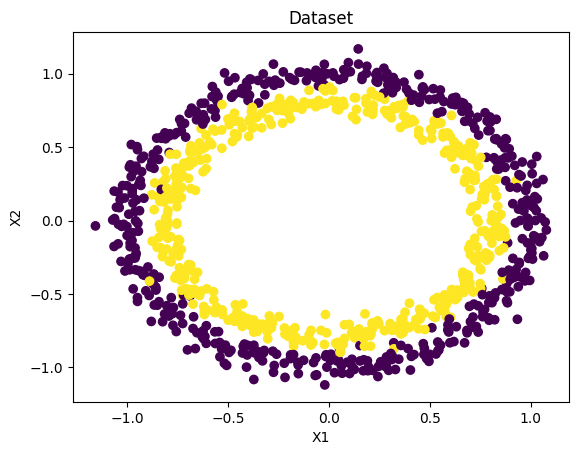

In [543]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.title ("Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [544]:
X_train

tensor([[-0.8773,  0.4024],
        [ 0.2163,  0.7227],
        [ 0.5410,  0.6583],
        ...,
        [ 0.2165,  0.7348],
        [-1.0395,  0.0876],
        [ 1.0253, -0.1127]])

In [545]:
y_train

tensor([0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
        0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
        0., 0., 0., 1., 0., 1., 1., 1., 

In [546]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1)
    # Notice there is no ReLU after the final linear layer.
)

# This is how you have to write the code using nn.Sequential which is equivalent to CircleModelV2 , it was a bit confusing
# in the super() we define layers and then in forward we use it in any order , the layers are defined once in the super and order how they are used is stated in forward in nn.Module

In [547]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0

In [548]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn_1 = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [549]:
epochs = 1001

for i in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn_1(y_logits,y_train)
  optimizer_1.zero_grad()
  loss.backward()
  optimizer_1.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn_1(test_logits,y_test)

  if i % 100 == 0:
    print(f"Epoch : {i} , Training Loss : {loss} , Testing Loss : {test_loss} ")

Epoch : 0 , Training Loss : 0.6928190588951111 , Testing Loss : 0.6937879920005798 
Epoch : 100 , Training Loss : 0.6911741495132446 , Testing Loss : 0.6919347643852234 
Epoch : 200 , Training Loss : 0.6897822022438049 , Testing Loss : 0.6903601884841919 
Epoch : 300 , Training Loss : 0.6879207491874695 , Testing Loss : 0.6883019804954529 
Epoch : 400 , Training Loss : 0.6853668093681335 , Testing Loss : 0.6854599118232727 
Epoch : 500 , Training Loss : 0.6817502379417419 , Testing Loss : 0.681212306022644 
Epoch : 600 , Training Loss : 0.676662266254425 , Testing Loss : 0.675300657749176 
Epoch : 700 , Training Loss : 0.6694996356964111 , Testing Loss : 0.6672577857971191 
Epoch : 800 , Training Loss : 0.6587297320365906 , Testing Loss : 0.6555455923080444 
Epoch : 900 , Training Loss : 0.6383538246154785 , Testing Loss : 0.6352149248123169 
Epoch : 1000 , Training Loss : 0.6011582612991333 , Testing Loss : 0.5997155904769897 


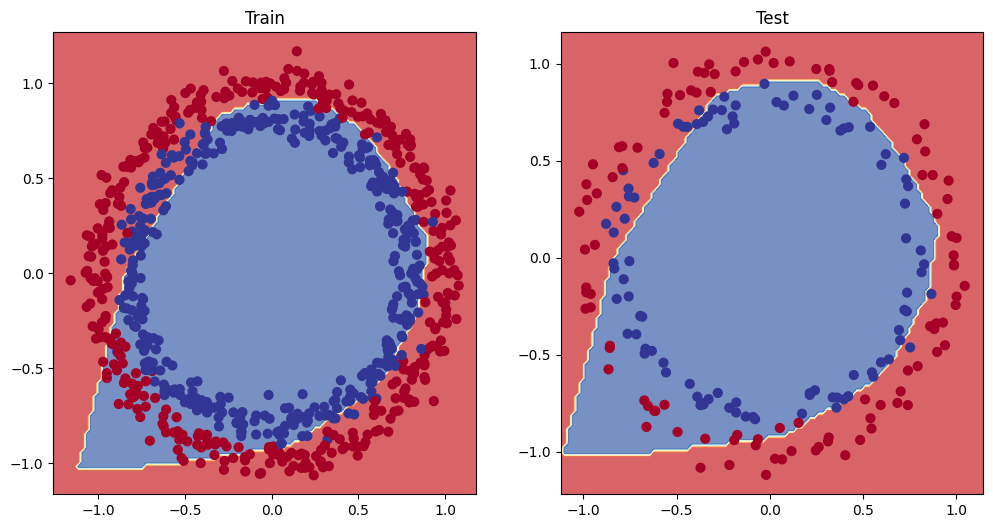

In [550]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [551]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [552]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn_3 = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer_3 = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [553]:
epochs = 1001

for i in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn_3(y_logits,y_train)
  optimizer_3.zero_grad()
  loss.backward()
  optimizer_3.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn_3(test_logits,y_test)

  if i % 100 == 0:
    print(f"Epoch : {i} , Training Loss : {loss} , Testing Loss : {test_loss} ")

Epoch : 0 , Training Loss : 0.6951399445533752 , Testing Loss : 0.6910632848739624 
Epoch : 100 , Training Loss : 0.6913160681724548 , Testing Loss : 0.6920421123504639 
Epoch : 200 , Training Loss : 0.6902732253074646 , Testing Loss : 0.6915633678436279 
Epoch : 300 , Training Loss : 0.6891507506370544 , Testing Loss : 0.6908060312271118 
Epoch : 400 , Training Loss : 0.6879610419273376 , Testing Loss : 0.6899656653404236 
Epoch : 500 , Training Loss : 0.686613142490387 , Testing Loss : 0.6889610290527344 
Epoch : 600 , Training Loss : 0.6850593686103821 , Testing Loss : 0.6876007318496704 
Epoch : 700 , Training Loss : 0.6831815838813782 , Testing Loss : 0.6858704090118408 
Epoch : 800 , Training Loss : 0.6809087991714478 , Testing Loss : 0.6838043332099915 
Epoch : 900 , Training Loss : 0.6780775189399719 , Testing Loss : 0.6811074018478394 
Epoch : 1000 , Training Loss : 0.674584150314331 , Testing Loss : 0.6777897477149963 


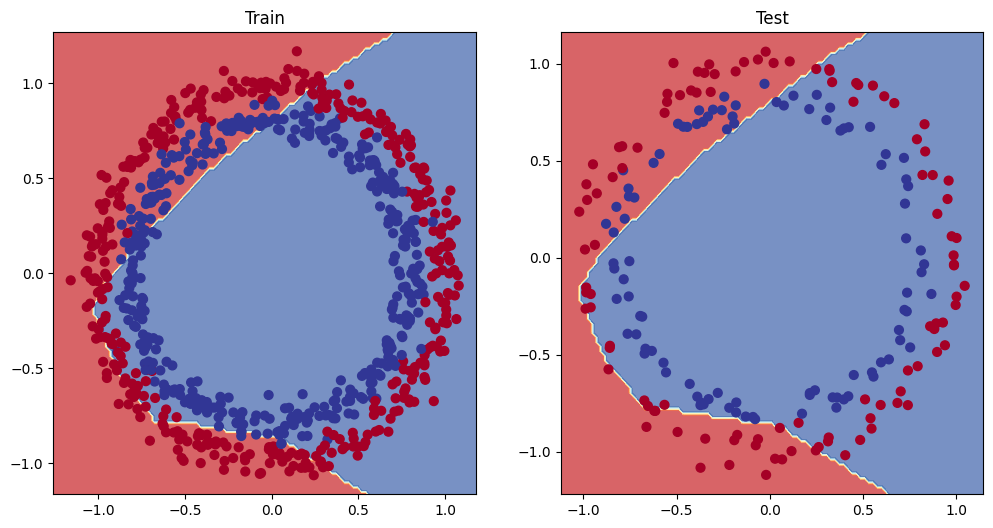

In [554]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [555]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True)
MODEL_NAME = "Pytorch_Neural_Network_Classification_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(model_3.state_dict(),MODEL_SAVE_PATH)